In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
#Turn all categories into numbers
data_one_hot = pd.get_dummies(data, dtype=int)

#Create X & y values
X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

#Compile and train the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13463.6934 - mae: 13463.6934 - val_loss: 12418.7207 - val_mae: 12418.7207
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13424.7266 - mae: 13424.7266 - val_loss: 12364.0010 - val_mae: 12364.0010
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13340.1396 - mae: 13340.1396 - val_loss: 12241.3076 - val_mae: 12241.3076
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13163.1553 - mae: 13163.1553 - val_loss: 12002.3115 - val_mae: 12002.3115
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12839.0518 - mae: 12839.0518 - val_loss: 11588.0605 - val_mae: 11588.0605
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12307.1299 - mae: 12307.1299 - val_loss: 10939.4268 - val_mae: 10939.4268
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11519.9248 - mae: 11519.9248 - val_loss: 1004

[5510.12109375, 5510.12109375]

9/9 [==============================] - 0s 1ms/step - loss: 2460.6182 - mae: 2460.6182


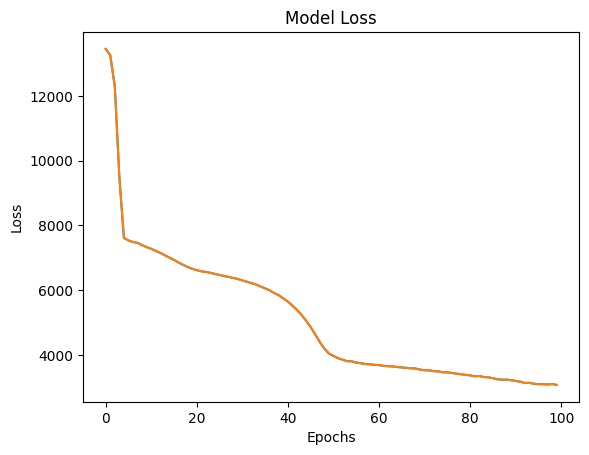

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
data_one_hot = pd.get_dummies(data, dtype=int)

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, verbose=0)
model.evaluate(X_test, y_test)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

9/9 [==============================] - 0s 1ms/step - loss: 1239.6777 - mae: 1239.6777


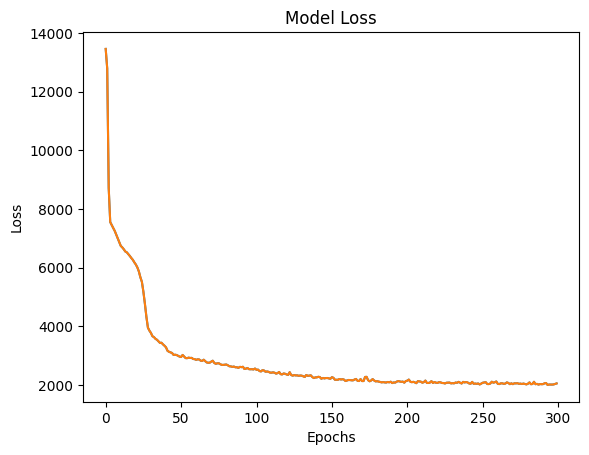

9/9 [==============================] - 0s 1ms/step - loss: 1239.6777 - mae: 1239.6777


(1239.677734375, 1239.677734375)

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
data_one_hot = pd.get_dummies(data, dtype=int)

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=256, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=300, verbose=0)
model.evaluate(X_test, y_test)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

model_loss, model_mae = model.evaluate(X_test, y_test)
model_loss, model_mae

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
#Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) #one hot encoding
)

X = data.drop("charges", axis=1)
y = data["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

ct.fit(X_train)
#Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

#Build the insurance model
insurance_model = Sequential([
    Dense(units=256, activation='relu', input_shape=(X_train_normal.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

# Compile the insurance model
insurance_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#Fit the insurance model
insurance_history = insurance_model.fit(X_train_normal, y_train, epochs=300, verbose=0) 

# Evaulate insurance model
insurance_model_loss, insurance_model_mae = insurance_model.evaluate(X_test_normal, y_test)

plt.plot(insurance_history.history['loss'], label='Train Loss')
plt.plot(insurance_history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

model_results = [["model", model_mae],
                 ["insurance_model", insurance_model_mae]]
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
print("\n", all_results)